# Uber Fare Prediction

# Task on Dataset
- KNN for Regression
- Logistic Regression
- Ridge
- Lasso

# Project Flow

1. Checking the Null Values in the column and removing columns having more tha 60% of null values.

2. Replace null values with mean or median for numerical data and filling with mode for categorical data.

3. Type casting :

    - Checking for inappropriate data types and convert them 
    - 
    
4. Divide the data into numerical and categorical.

5. Identify , Remove un-necessary columns in the DataFrame.

6. Check for outliers in numerical data and remove or replace them with median.

    - Identifying co relation in  numerical columns and remove columns that are highy co related
    
7. Check categorical columns for value counts and if we have any feature engineering to do.

    - Creating columns for existing columns
    - Domain Knowledge is required
    
8. Identifying either category column belongs to Ordinal or Nominal and convert them accordingly.

9. Perform Standardization on numerical columns if necessary.

10. Assign a target column.

11. Divide the data into train test split.

12. Model Building.

    - KNN for Regression
    - Logistic Regression
    - Ridge Regression
    - Lasso Regression
    
13. Evaluation Metrics.

    - Mean Squared Error
    - Root Mean Squared Error
    - R Squared
    
14. Basic Analysis [Co-relation analysis].

    - Heat Map

In [1]:
# Installing necessary packages

In [2]:
! pip install geopy

In [3]:
# Installing Haversine to calculate distance

In [4]:
! pip install haversine

In [5]:
# Importing Geographical Python Library to calculate the distance based on latitude and longitude

In [6]:
import geopy.distance

In [7]:
# Importing Haversine module

In [8]:
from haversine import haversine, Unit

In [9]:
# Importing the libraries

In [10]:
import math
import numpy as np
import pandas as pd

In [11]:
#Importing the basic librarires

import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [12]:
# Reading the file

In [13]:
Uber_fare_prediction = pd.read_csv("uber.csv")
Uber_fare_prediction

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [14]:
# Creating a copy of the Dataset

In [15]:
Uber = Uber_fare_prediction.copy()
Uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [16]:
# Basic Analysis

In [17]:
# Uber.head()
# Uber.tail()
#Uber.info()
# Uber.describe()

In [18]:
# Dropping null values

In [19]:
Uber.dropna(inplace=True)
Uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [20]:
# Passenger Count Unique values

In [21]:
Uber['passenger_count'].value_counts()

1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: passenger_count, dtype: int64

In [22]:
# Dropping records with passenger count less than 1 and greater than 6

In [23]:
Uber.drop(Uber[(Uber['passenger_count'] == 0) | (Uber["passenger_count"] > 6 )].index, axis=0, inplace = True)

In [24]:
# Fare Unique values

In [25]:
Uber['fare_amount'].value_counts()

6.50      9648
4.50      8209
8.50      7497
5.70      5825
5.30      5803
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: fare_amount, Length: 1244, dtype: int64

In [26]:
# Dropping records with fare less than $3

In [27]:
Uber.drop(Uber[(Uber["fare_amount"] <= 2.5) | (Uber["fare_amount"] > 230)].index,axis=0, inplace=True) 
#Minimum base fair for the taxi service is 2.5$ in newyork

In [28]:
Uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [29]:
# Dropping Un necessary Columns

In [30]:
Uber.drop(labels='Unnamed: 0',axis=1,inplace=True)
Uber.drop(labels='key',axis=1,inplace=True)
Uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [31]:
# Dealing with Categorical columns

In [32]:
# Using Date Time Module
    # - Converting the data type of the column to 'Date_time'

In [33]:
Uber["pickup_datetime"] = pd.to_datetime(Uber["pickup_datetime"])
Uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198441 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        198441 non-null  float64            
 1   pickup_datetime    198441 non-null  datetime64[ns, UTC]
 2   pickup_longitude   198441 non-null  float64            
 3   pickup_latitude    198441 non-null  float64            
 4   dropoff_longitude  198441 non-null  float64            
 5   dropoff_latitude   198441 non-null  float64            
 6   passenger_count    198441 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.1 MB


In [34]:
Uber.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [35]:
# Date Time

In [36]:
# Reframing the columns

In [37]:
Uber = Uber[(Uber.pickup_latitude<90) & (Uber.dropoff_latitude<90) &
        (Uber.pickup_latitude>-90) & (Uber.dropoff_latitude>-90) &
        (Uber.pickup_longitude<180) & (Uber.dropoff_longitude<180) &
        (Uber.pickup_longitude>-180) & (Uber.dropoff_longitude>-180)]


Uber["Distance in Km"] = [haversine((i,j),(k,l)) for i,j,k,l in zip(Uber["pickup_latitude"],Uber["pickup_longitude"],Uber["dropoff_latitude"],Uber["dropoff_longitude"])]

Uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance in Km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875053
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850337
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539720


In [38]:
# Removing records with '0' Kms distance travelled

In [39]:
Uber.drop(Uber[Uber["Distance in Km"] == 0.0].index,axis=0,inplace=True)

In [40]:
Uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance in Km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875053
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850337
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539720


In [41]:
# Feature Engineering

In [42]:
# Creating more columns from existing columns

In [43]:
Uber["Year"] = Uber["pickup_datetime"].dt.year
Uber["Month"] = Uber["pickup_datetime"].dt.month_name()
Uber["Date"] =Uber["pickup_datetime"].dt.day
Uber["Day"] = Uber["pickup_datetime"].dt.day_name()
Uber["Hour"] = Uber["pickup_datetime"].dt.hour

In [44]:
Uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance in Km,Year,Month,Date,Day,Hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325,2015,May,7,Thursday,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593,2009,July,17,Friday,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,2009,August,24,Monday,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686,2009,June,26,Friday,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456,2014,August,28,Thursday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,2012,October,28,Sunday,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875053,2014,March,14,Friday,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850337,2009,June,29,Monday,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539720,2015,May,20,Wednesday,14


In [45]:
# Dropping 'pickup_datetime' columns

In [46]:
Uber.drop(labels = 'pickup_datetime',axis=1,inplace=True)
Uber.drop(labels = 'pickup_longitude',axis=1,inplace=True)
Uber.drop(labels = 'pickup_latitude',axis=1,inplace=True)
Uber.drop(labels = 'dropoff_longitude',axis=1,inplace=True)
Uber.drop(labels = 'dropoff_latitude',axis=1,inplace=True)
Uber

,fare_amount,passenger_count,Distance in Km,Year,Month,Date,Day,Hour
0,7.5,1,1.683325,2015,May,7,Thursday,19
1,7.7,1,2.457593,2009,July,17,Friday,20
2,12.9,1,5.036384,2009,August,24,Monday,21
3,5.3,3,1.661686,2009,June,26,Friday,8
4,16.0,5,4.475456,2014,August,28,Thursday,17
...,...,...,...,...,...,...,...,...
199995,3.0,1,0.112210,2012,October,28,Sunday,10
199996,7.5,1,1.875053,2014,March,14,Friday,1
199997,30.9,2,12.850337,2009,June,29,Monday,0
199998,14.5,1,3.539720,2015,May,20,Wednesday,14


In [47]:
# Creating a copy of the dataset for EDA

In [48]:
uuber = Uber.copy()
uuber

,fare_amount,passenger_count,Distance in Km,Year,Month,Date,Day,Hour
0,7.5,1,1.683325,2015,May,7,Thursday,19
1,7.7,1,2.457593,2009,July,17,Friday,20
2,12.9,1,5.036384,2009,August,24,Monday,21
3,5.3,3,1.661686,2009,June,26,Friday,8
4,16.0,5,4.475456,2014,August,28,Thursday,17
...,...,...,...,...,...,...,...,...
199995,3.0,1,0.112210,2012,October,28,Sunday,10
199996,7.5,1,1.875053,2014,March,14,Friday,1
199997,30.9,2,12.850337,2009,June,29,Monday,0
199998,14.5,1,3.539720,2015,May,20,Wednesday,14


In [49]:
# Defining a function to check Outliers in each Numerical Column

In [50]:
def detect_outliers(col):
  q1 = Uber[col].quantile(0.25)
  q3 = Uber[col].quantile(0.75)

  iqr = q3-q1

  lb = q1-(1.5*iqr)
  ub = q3+(1.5*iqr)

  print("Upper bound",ub)
  print("Lower bound",lb)
  print("Median",Uber[col].median())
  print("Mean",Uber[col].mean())

  outliers = Uber[(Uber[col]<lb) | (Uber[col] >ub)]
  outliers
  Uber.drop(outliers.index,inplace=True)

In [51]:
detect_outliers("fare_amount")

Upper bound 22.25
Lower bound -3.75
Median 8.5
Mean 11.389302041239251


In [52]:
detect_outliers("Distance in Km")

Upper bound 6.512279353829237
Lower bound -1.9424455372198193
Median 2.017693675376954
Mean 16.369877677395635


In [53]:
#num_df = Uber.select_dtypes(include="number").iloc[:,1:]

In [54]:
Uber.shape

(168458, 8)

In [55]:
# Setting the Target column

In [56]:
y = Uber['fare_amount']
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 168458, dtype: float64

In [57]:
# Removing Target Column

In [58]:
Uber.drop(labels = 'fare_amount',axis=1,inplace=True)
Uber

,passenger_count,Distance in Km,Year,Month,Date,Day,Hour
0,1,1.683325,2015,May,7,Thursday,19
1,1,2.457593,2009,July,17,Friday,20
2,1,5.036384,2009,August,24,Monday,21
3,3,1.661686,2009,June,26,Friday,8
4,5,4.475456,2014,August,28,Thursday,17
...,...,...,...,...,...,...,...
199994,1,1.122879,2014,January,31,Friday,14
199995,1,0.112210,2012,October,28,Sunday,10
199996,1,1.875053,2014,March,14,Friday,1
199998,1,3.539720,2015,May,20,Wednesday,14


In [59]:
# Getting Numerical and Categorical columns seperately

In [60]:
# Numerical Columns

In [61]:
uber_num_df = Uber.select_dtypes(include = 'number')
uber_num_df

,passenger_count,Distance in Km,Year,Date,Hour
0,1,1.683325,2015,7,19
1,1,2.457593,2009,17,20
2,1,5.036384,2009,24,21
3,3,1.661686,2009,26,8
4,5,4.475456,2014,28,17
...,...,...,...,...,...
199994,1,1.122879,2014,31,14
199995,1,0.112210,2012,28,10
199996,1,1.875053,2014,14,1
199998,1,3.539720,2015,20,14


In [62]:
# Categorical Columns

In [63]:
uber_cat_df = Uber.select_dtypes(exclude = 'number')
uber_cat_df

,Month,Day
0,May,Thursday
1,July,Friday
2,August,Monday
3,June,Friday
4,August,Thursday
...,...,...
199994,January,Friday
199995,October,Sunday
199996,March,Friday
199998,May,Wednesday


In [64]:
end

NameError: name 'end' is not defined

# Getting selected columns to avoid encoding on these columns

uber_num_df_1 = uber_num_df[['year','month','hour']]
uber_num_df_1

# Dropping columns

uber_num_df.drop(labels = 'year',axis=1,inplace=True)
uber_num_df.drop(labels = 'month',axis=1,inplace=True)
uber_num_df.drop(labels = 'hour',axis=1,inplace=True)

uber_num_df

uber_num_df_1

In [ ]:
# Encoding 

In [65]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
uber_num_df = pd.DataFrame(ss.fit_transform(uber_num_df),columns=uber_num_df.columns)

In [66]:
uber_num_df

,passenger_count,Distance in Km,Year,Date,Hour
0,-0.527228,-0.430895,1.758146,-1.002096,0.840518
1,-0.527228,0.111192,-1.464099,0.149229,0.995952
2,-0.527228,1.916673,-1.464099,0.955157,1.151386
3,1.005189,-0.446045,-1.464099,1.185422,-0.869260
4,2.537607,1.523952,1.221105,1.415687,0.529649
...,...,...,...,...,...
168453,-0.527228,-0.823278,1.221105,1.761085,0.063346
168454,-0.527228,-1.530875,0.147023,1.415687,-0.558391
168455,-0.527228,-0.296661,1.221105,-0.196168,-1.957300
168456,-0.527228,0.868818,1.758146,0.494627,0.063346


In [ ]:
# Categorical Columns                                          

In [67]:
OneEncoder = ['Day','Month']
uber_cat_df = pd.get_dummies(uber_cat_df,columns = OneEncoder)

In [68]:
uber_cat_df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
199995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
199996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
199998,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Resetting Indexes

In [69]:
uber_cat_df.reset_index(drop=True,inplace=True)
uber_num_df.reset_index(drop=True,inplace=True)
#uber_num_df_1.reset_index(drop=True,inplace=True)

In [ ]:
# Concatenating both numerical and categorical columns

In [70]:
Uber_ML = pd.concat([uber_num_df,uber_cat_df], axis=1)
Uber_ML

,passenger_count,Distance in Km,Year,Date,Hour,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,-0.527228,-0.430895,1.758146,-1.002096,0.840518,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.527228,0.111192,-1.464099,0.149229,0.995952,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.527228,1.916673,-1.464099,0.955157,1.151386,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.005189,-0.446045,-1.464099,1.185422,-0.869260,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2.537607,1.523952,1.221105,1.415687,0.529649,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168453,-0.527228,-0.823278,1.221105,1.761085,0.063346,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
168454,-0.527228,-1.530875,0.147023,1.415687,-0.558391,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
168455,-0.527228,-0.296661,1.221105,-0.196168,-1.957300,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
168456,-0.527228,0.868818,1.758146,0.494627,0.063346,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#uber_num_df_1,

In [ ]:
# Setting the 'X' column

In [71]:
x = Uber_ML
x

,passenger_count,Distance in Km,Year,Date,Hour,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,-0.527228,-0.430895,1.758146,-1.002096,0.840518,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.527228,0.111192,-1.464099,0.149229,0.995952,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.527228,1.916673,-1.464099,0.955157,1.151386,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.005189,-0.446045,-1.464099,1.185422,-0.869260,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2.537607,1.523952,1.221105,1.415687,0.529649,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168453,-0.527228,-0.823278,1.221105,1.761085,0.063346,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
168454,-0.527228,-1.530875,0.147023,1.415687,-0.558391,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
168455,-0.527228,-0.296661,1.221105,-0.196168,-1.957300,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
168456,-0.527228,0.868818,1.758146,0.494627,0.063346,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
print(x)

In [ ]:
y

In [ ]:
# Train Test Split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train,x_test,y_train,y_test.shape

In [ ]:
END

# Model Building

### KNN For Regression

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the model on the training data
knn_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
#print(f"R-squared: {r2}")
print("R2 Score : ",r2_score(y_test,y_pred)*100)

Root Mean Squared Error: 2.258895518012387
Mean Squared Error: 5.10260896129645
R2 Score :  62.78143535761098


In [ ]:
# Predictions

In [ ]:
y_pred = knn_regressor.predict(x_test)
print(y_pred)

In [ ]:
len(y_pred)

In [ ]:
fare = pd.DataFrame(y_pred)
fare

In [ ]:
# Code 2

In [ ]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train,y_train)
ky_pred = knn.predict(x_test)
kx_train = knn.predict(x_train)

print("Mean Squared Error",mean_squared_error(y_train,kx_train,squared=False))
print("Train R2 Score",r2_score(y_train,kx_train)*100)
print("Test R2 Score",r2_score(y_test,ky_pred)*100)

### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

predictedvalues = lrmodel.predict(x_test)

lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE value for Linear regression is", lrmodelrmse)
print(f"Mean Squared Error: {mse}")
#print(f"R-squared: {r2}")
print("R2 Score : ",r2_score(y_test,y_pred)*100)

RMSE value for Linear regression is 2.1367666427054033
Mean Squared Error: 5.10260896129645
R2 Score :  62.78143535761098


In [ ]:
# Code 2

In [ ]:
y_pred = LinearRegression().fit(x_train,y_train).predict(x_test)
ly_pred = LinearRegression().fit(x_train,y_train).predict(x_train)

print("Mean Squared error",mean_squared_error(y_test,y_pred,squared=False))
print("Test R2_Score",r2_score(y_test,y_pred)*100)
print("Train R2_Score",r2_score(y_train,ly_pred)*100)

### Ridge Regression

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model
alpha = 1.0  # You can adjust the regularization strength (alpha) as needed
ridge_reg = Ridge(alpha=alpha)

# Fit the model on the training data
ridge_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
#print(f"R-squared: {r2}")
print("R2 Score : ",r2_score(y_test,y_pred)*100)

Root Mean Squared Error: 2.1367666427054033
Mean Squared Error: 4.565809641510547
R2 Score :  66.69686378549622


In [ ]:
# Code 2

In [ ]:
ly_pred = Lasso(alpha=.5).fit(x_train,y_train).predict(x_test)
lx_pred = Lasso(alpha=.5).fit(x_train,y_train).predict(x_train)

print("Mean Squared error",mean_squared_error(y_test,ly_pred,squared=False))
print("Test R2_Score",r2_score(y_test,ly_pred)*100)
print("Train R2_Score",r2_score(y_train,lx_pred)*100)

### Lasso Regression

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
alpha = 1.0  # You can adjust the regularization strength (alpha) as needed
lasso_reg = Lasso(alpha=alpha)

# Fit the model on the training data
lasso_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lasso_reg.predict(x_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
#print(f"R-squared: {r2}")
print("R2 Score : ",r2_score(y_test,y_pred)*100)

Root Mean Squared Error: 2.1367666427054033
Mean Squared Error: 6.039275998897988
R2 Score :  55.94936122616305


In [ ]:
# Code 2

In [ ]:
ry_pred = Ridge(alpha=.5).fit(x_train,y_train).predict(x_test)
rytrain_pred = Ridge().fit(x_train,y_train).predict(x_train)

print("Mean Squared error",mean_squared_error(y_test,ry_pred,squared=False))
print("Test R2_Score",r2_score(y_test,ry_pred)*100)
print("Train R2_score",r2_score(y_train,rytrain_pred)*100)

### Elastic Net

In [77]:
from sklearn.linear_model import ElasticNetCV

en = ElasticNetCV()
en.fit(x_train,y_train)
ey_pred = en.predict(x_test)

print("Mean Squared error : ",mean_squared_error(y_test,ey_pred,squared=False))
print("Test R2 Score : ",r2_score(y_test,ey_pred)*100)

Mean Squared error :  2.137306960979485
Test R2 Score :  66.68029610511127


# EDA

In [ ]:
uuber

In [ ]:
# KDE Plot

In [ ]:
# Distance Travelled

In [ ]:
sns.kdeplot(x=uuber[uuber["Distance"]<40]["Distance"],fill=True,color="Green")

In [ ]:
# Box Plot

In [ ]:
# Weekdays

In [ ]:
sns.boxplot(uuber,x="weekday",y="fare_amount")

In [ ]:
# No of Passengers and Fare

In [ ]:
sns.boxplot(uuber,x="passenger_count",y="fare_amount")

In [ ]:
# Month and Fare

In [ ]:
sns.boxplot(uuber,x="month",y="fare_amount")

In [ ]:
# Hour and Fare 

In [ ]:
sns.boxplot(uuber,x="hour",y="fare_amount")

In [ ]:
# Distance and Fare

In [ ]:
#sns.boxplot(uuber,x="distance_km",y="fare_amount")

In [ ]:
# Heat Map

In [ ]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)

# plt.figure(figsize = (8,5))

# Correlation plot using "heatmap"
sns.heatmap(round(uuber.corr(),1), annot = True)
plt.show() 

In [ ]:
# Line Graph

In [ ]:
# Fare

In [ ]:
plt.figure(figsize = (15,5))
uuber['fare_amount'].plot() #by default plot function gives the line chart 
plt.xlabel("fare_amount")
plt.ylabel("Frequency")
plt.title('Line Graph' , fontsize = 20)
plt.show()

In [ ]:
# Scatter Plot

In [ ]:
# Distance Travelled and Fare

In [ ]:
sns.scatterplot(x = uuber["Distance"] , y = uuber["fare_amount"])

In [ ]:
# Weekday and Fare

In [ ]:
sns.scatterplot(x = uuber["weekday"] , y = uuber["fare_amount"])

In [ ]:
# Passenger Count and Fare

In [ ]:
sns.scatterplot(x = uuber["passenger_count"] , y = uuber["fare_amount"])

In [ ]:
# Month and Fare

In [ ]:
sns.scatterplot(x = uuber["month"] , y = uuber["fare_amount"])

In [ ]:
# Multi Variate Analysis

In [ ]:
# 

# Presentation EDA

In [ ]:
# Distance Travelled

<Axes: xlabel='Distance in Km', ylabel='Density'>

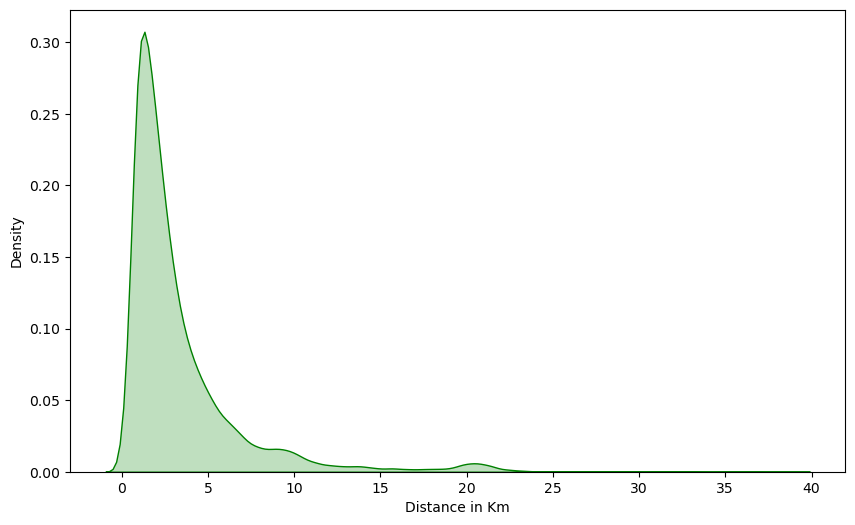

In [78]:
sns.kdeplot(x=uuber[uuber["Distance in Km"]<40]["Distance in Km"],fill=True,color="Green")

In [ ]:
# Most travelled distance is below 10 Kms

In [ ]:
# Fare

<Axes: xlabel='fare_amount', ylabel='Density'>

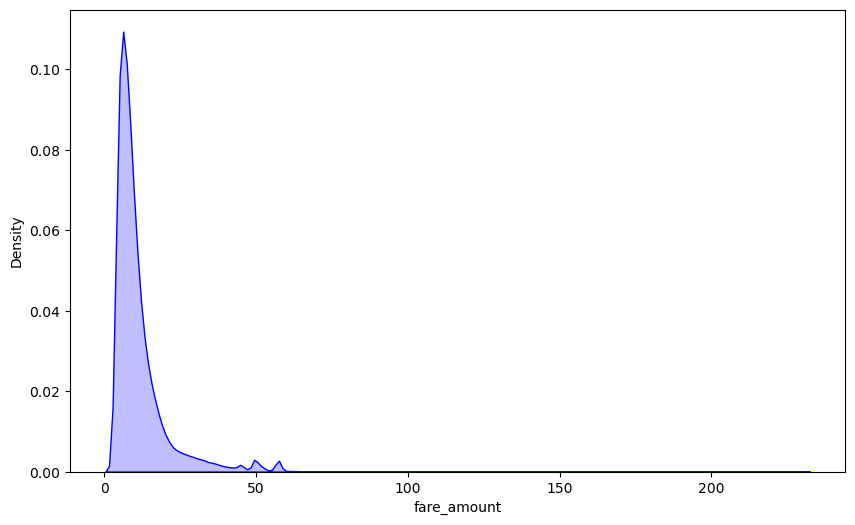

In [79]:
sns.kdeplot(x=uuber["fare_amount"],fill=True,color="Blue")

In [ ]:
#Average fare is below $50

In [ ]:
# Passenger Count

In [ ]:
sns.countplot(x=uuber["passenger_count"])

In [ ]:
# Most passengers are travelling alone 

In [ ]:
# Year wise bookings

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=uuber["Year"],order=uuber["Year"].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

In [ ]:
# 2012 has the higest user rate

In [ ]:
# Weekday

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=uuber["Day"],order=uuber["Day"].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

In [ ]:
# Most bookings are done on Fridays

In [ ]:
# Peak Hour

In [ ]:
sns.countplot(x=uuber["Hour"],order=uuber["Hour"].value_counts().index)

In [ ]:
# Peak hours are between 07:00 PM to 09:00 PM

In [ ]:
# Month

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x=uuber["Month"],order=uuber["Month"].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

In [ ]:
# Most bookings are made in March,April and May

In [ ]:
# 